In [1]:
import os
import sys
import json

import numpy as np
import tensorflow as tf
from tqdm import tqdm

from nn import *
from myLSTM import *

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sys
import os
import pickle
import argparse

import tensorflow as tf
import numpy as np

from extended_model import BaseModel, CaptionGenerator
from prepare_data import DataSet

In [2]:
params= {}

params['phase'] = 'test' # Phase: Can be train, val or test
params['load'] = False # Turn on to load the pretrained model

params['mean_file'] = './utils/ilsvrc_2012_mean.npy' # Dataset image mean: a Numpy array with (Channel, Height, Width dimensions
params['cnn_model'] = 'resnet152' # CNN model to use: Can be vgg16, resnet50, resnet101 or resnet152
params['cnn_model_file'] = './data_output' # Tensorflow model file for the chosen CNN model
params['load_cnn_model'] = True # Turn on to load the pretrained CNN model
params['train_cnn'] = False # Turn on to jointly train CNN and RNN. Otherwise, only RNN is trained

params['train_image_dir'] = './train/images/' # Directory containing the COCO train2014 images
params['train_caption_file'] = './train/captions_train2014.json' # JSON file storing the captions for COCO train2014 images
params['train_annotation_file'] = './train/anns.csv' # Temporary file to store the training information

params['val_image_dir'] = './val/images/' # Directory containing the COCO val2014 images
params['val_caption_file'] = './val/captions_val2014.json' # JSON file storing the captions for COCO val2014 images
params['val_result_dir'] = './val/results/' # Directory to store the validation results as images

params['test_image_dir'] = './test/images/' # Directory containing the testing images
params['test_result_file'] = './results.json' # File to store the testing results
params['test_result_dir'] = './test/results/' # Directory to store the testing results as images


params['glove_dir'] = './words/' # Directory containing the GloVe data
params['max_sent_len'] = 30 # Maximum length of the generated caption
params['vocab_size'] = 50000 # Maximum vocabulary size

params['save_period'] = 2000 # Period to save the trained model

params['solver'] = 'adam' # Optimizer to use: Can be adam, momentum, rmsprop or sgd
params['num_epochs'] = 10 # Number of training epochs
params['batch_size'] = 64 # Batch size
params['learning_rate'] = 1e-3 # Learning rate
params['weight_decay'] = 5e-4 # Weight decay
params['momentum'] = 0.9 # Momentum (for some optimizers
params['decay'] = 0.9 # Decay (for some optimizers
params['batch_norm'] = True # Turn on to use batch normalization

params['num_lstm'] = 1 # Number of LSTMs to use: Can be 1 or 2
params['dim_hidden'] = 1000 # Dimension of the hidden state in each LSTM
params['dim_embed'] = 16 # Dimension of the word embedding
params['dim_dec'] = 1000 # Dimension of the vector used for word generation
params['num_init_layers'] = 2 # Number of layers in the MLP for initializing the LSTMs
params['init_lstm_with_fc_feats'] = False # Turn on to initialize the LSTMs with fc7 feats of VGG16 net. Only useful if VGG16 is used
params['init_embed_with_glove'] = False # Turn on to initialize the word embedding with the GloVe data
params['fix_embed_weight'] = False # Turn on to fix the word embedding
params['init_dec_bias'] = False # Turn on to initialize the bias for word generation with the frequency of each word
params['class_balancing_factor'] = 0.0 # Class balancing factor. The larger it is, the model pays more attention to rare words.

params['cut'] = False
params['english'] = False
params['valid_images_dir'] = './valid/images/'
params['valid_caption_file'] = './valid/captions.json'

params['caption_file'] = "/home/share/data/valid/valid_captions.json"
params['word_table_file'] = "./vocabulary/char_table_dim_16_stop.pickle" # Temporary file to store the word table
params['save_dir'] = './extended_early_stop' # Directory to contain the trained model
params['test_result_file'] ='demo.json'

params['images_dir'] = "/home/share/cnn_rnn/demo_image/"



class dict2obj(dict):
    def __init__(self, d, default=None):
        self.__d = d
        self.__default = default
        super(self.__class__, self).__init__(d)

    def __getattr__(self, k):
        if k in self.__d:
            v = self.__d[k]
            if isinstance(v, dict):
                v = self.__class__(v)
            setattr(self, k, v)
            return v
        return self.__default
params = dict2obj(params)

In [17]:
test_data = DataSet(images_dir=params.images_dir,
                    save_file=params.word_table_file, 
                    english=params.english)
test_data.load()


In [18]:
print(test_data.num_images)
print(test_data.idx_imagefile)

4
{0: '0285b4b6b4b358e1d80899619b639c0f3fefd6c7.jpg', 1: '9219ae980ed3e36ff578d98d04a64d03b38f1a2a.jpg', 2: '83de91b4bccc3071e4770ffc46d42bc7893b261f.jpg', 3: 'c14280a33253fb332ee6faebb67fcb6d8ec907c1.jpg'}


In [5]:
model = CaptionGenerator(params, 
                        'test', 
                        test_data.num_words, 
                        test_data.word2vec, 
                        test_data.idx2word)

Building the CNN part...
CNN part built.
Building the RNN part...
RNN part built.


In [21]:
with tf.Session() as sess:    
        sess.run(tf.global_variables_initializer())

        model.load(sess)

        model.test(sess, test_data)

Loading model...
INFO:tensorflow:Restoring parameters from ./extended_early_stop/resnet152/model.ckpt-4401


  0%|          | 0/4 [00:00<?, ?it/s]

Testing the model ...


100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

Testing complete.


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [22]:
import json
j = json.load(open('demo.json'))

一个戴着墨镜的女人走在平坦的道路上
9219ae980ed3e36ff578d98d04a64d03b38f1a2a.jpg
一个穿着运动服的男人和一个穿着运动服的男人在运动场上踢足球
0285b4b6b4b358e1d80899619b639c0f3fefd6c7.jpg
球场上有两个穿着球衣的男人在打篮球
83de91b4bccc3071e4770ffc46d42bc7893b261f.jpg
一个穿着裙子的女人和一个穿着裙子的女人站在广告牌前
c14280a33253fb332ee6faebb67fcb6d8ec907c1.jpg


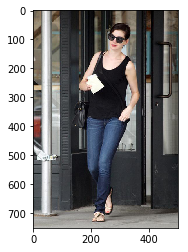

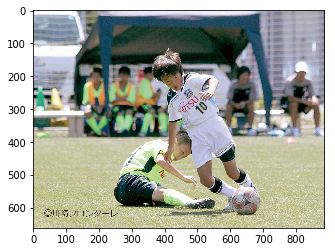

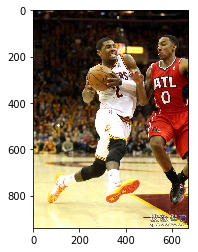

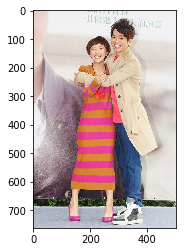

In [25]:
for fn, cap in j.items():
    plt.figure()
    img_bgr = cv2.imread(params['images_dir']+fn)
    img_rgb = np.zeros(img_bgr.shape, img_bgr.dtype)
    img_rgb[:,:,0] = img_bgr[:,:,2]
    img_rgb[:,:,1] = img_bgr[:,:,1]
    img_rgb[:,:,2] = img_bgr[:,:,0]
#     plt.title(cap)
    imgplot = plt.imshow(img_rgb)
    print(cap)
    print(fn)
    

In [24]:
img2 = cv2.imread(params['images_dir']+fn)

In [18]:
np.shape(img)

(662, 887, 3)

In [25]:
img2[:,:,0] = img[:,:,1]
img2[:,:,1] = img[:,:,0]

In [21]:
a = np.swapaxes(img,0,1)

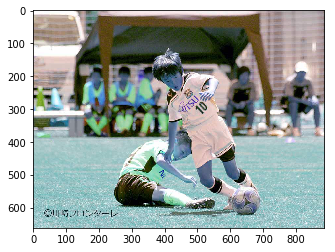

In [27]:
imgplot = plt.imshow(img)

In [ ]:
z